<a href="https://colab.research.google.com/github/Avijeetas/Online-Courses/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

In [23]:
print('train_data[0]={0}\ntrain_labels={1}'.format(train_data[0],train_labels[0])) 

train_data[0]=[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels=1


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))

  for i , sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

x_train=vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)



In [25]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

In [0]:
from keras import models,layers

In [0]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [29]:
x_val= x_train[:10000]
partial_x_train=x_train[10000:]

y_val= y_train[:10000]
partial_y_train=y_train[10000:]



hist = model.fit(partial_x_train,
                 partial_y_train,
                 epochs=25,
                 batch_size=512,
                 validation_data=(x_val,y_val),verbose=1)



Train on 15000 samples, validate on 10000 samples
Epoch 1/25
15000/15000 [==============================] - 2s 143us/step - loss: 0.5184 - accuracy: 0.7827 - val_loss: 0.3922 - val_accuracy: 0.8729
Epoch 2/25
15000/15000 [==============================] - 3s 182us/step - loss: 0.3141 - accuracy: 0.9023 - val_loss: 0.3092 - val_accuracy: 0.8883
Epoch 3/25
15000/15000 [==============================] - 2s 135us/step - loss: 0.2304 - accuracy: 0.9262 - val_loss: 0.2800 - val_accuracy: 0.8926
Epoch 4/25
15000/15000 [==============================] - 2s 138us/step - loss: 0.1825 - accuracy: 0.9411 - val_loss: 0.2766 - val_accuracy: 0.8885
Epoch 5/25
15000/15000 [==============================] - 2s 135us/step - loss: 0.1492 - accuracy: 0.9537 - val_loss: 0.2985 - val_accuracy: 0.8804
Epoch 6/25
15000/15000 [==============================] - 2s 136us/step - loss: 0.1237 - accuracy: 0.9624 - val_loss: 0.2915 - val_accuracy: 0.8843
Epoch 7/25
15000/15000 [==============================] - 2s 1

In [30]:
hist_dict= hist.history
hist_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# Plotting the training and validation loss

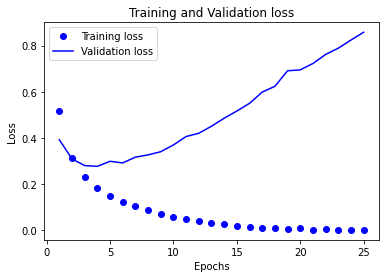

In [34]:
import matplotlib.pyplot as plt

loss=hist_dict['loss']
val_loss=hist_dict['val_loss']


epochs=range(1,len(loss)+1)


plt.plot(epochs,loss,'bo',label='Training loss')

plt.plot(epochs,val_loss,'b',label='Validation loss')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

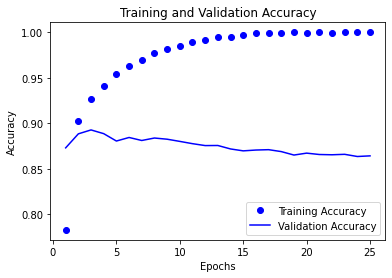

In [36]:
plt.clf()
acc=hist_dict['accuracy']
val_acc=hist_dict['val_accuracy']


epochs=range(1,len(acc)+1)


plt.plot(epochs,acc,'bo',label='Training Accuracy')

plt.plot(epochs,val_acc,'b',label='Validation Accuracy')


plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 epochs=4,
                 batch_size=512)

results= model.evaluate(x_test,y_test)



Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4351 - accuracy: 0.8262
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2490 - accuracy: 0.9119
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1952 - accuracy: 0.9293
Epoch 4/4
25000/25000 [==============================] - 1s 59us/step


In [38]:
results

[0.3000752127170563, 0.8813599944114685]

In [39]:
model.predict(x_test)

array([[0.21144596],
       [0.9997964 ],
       [0.7443646 ],
       ...,
       [0.09612012],
       [0.04190305],
       [0.45656762]], dtype=float32)

#Experiments


In [0]:
# 3 layer model
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
#model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist=model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_train,y_train),verbose=0)


In [51]:
hist_dict= hist.history
print(hist_dict.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


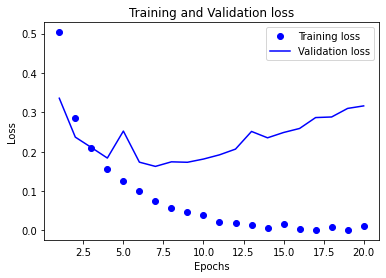

In [52]:
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']


epochs=range(1,len(loss)+1)


plt.plot(epochs,loss,'bo',label='Training loss')

plt.plot(epochs,val_loss,'b',label='Validation loss')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

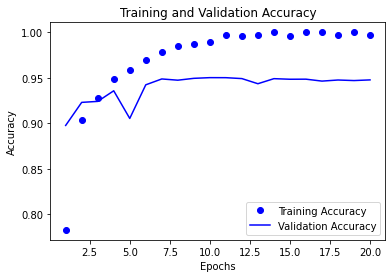

In [53]:
plt.clf()
acc=hist_dict['accuracy']
val_acc=hist_dict['val_accuracy']


epochs=range(1,len(acc)+1)


plt.plot(epochs,acc,'bo',label='Training Accuracy')

plt.plot(epochs,val_acc,'b',label='Validation Accuracy')


plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [54]:
model.fit(x_train,
          y_train,
          epochs=6,
          batch_size=512)
results= model.evaluate(x_test,y_test)
results


Epoch 1/6
25000/25000 [==============================] - 2s 98us/step - loss: 0.2228 - accuracy: 0.9475
Epoch 2/6
25000/25000 [==============================] - 2s 97us/step - loss: 0.1147 - accuracy: 0.9641
Epoch 3/6
25000/25000 [==============================] - 2s 98us/step - loss: 0.0774 - accuracy: 0.9755
Epoch 4/6
25000/25000 [==============================] - 2s 96us/step - loss: 0.0521 - accuracy: 0.9842
Epoch 5/6
25000/25000 [==============================] - 2s 99us/step - loss: 0.0326 - accuracy: 0.9906
Epoch 6/6
25000/25000 [==============================] - 2s 70us/step


[0.7092802409529686, 0.8596799969673157]

In [55]:
results

[0.7092802409529686, 0.8596799969673157]

In [56]:
model.predict(x_test)

array([[6.6366792e-04],
       [1.0000000e+00],
       [9.9999255e-01],
       ...,
       [2.7484894e-03],
       [9.9696517e-03],
       [9.8156881e-01]], dtype=float32)